In [2]:
import tensorflow as tf

import numpy as np
import cv2
import matplotlib.pyplot as plt
import os

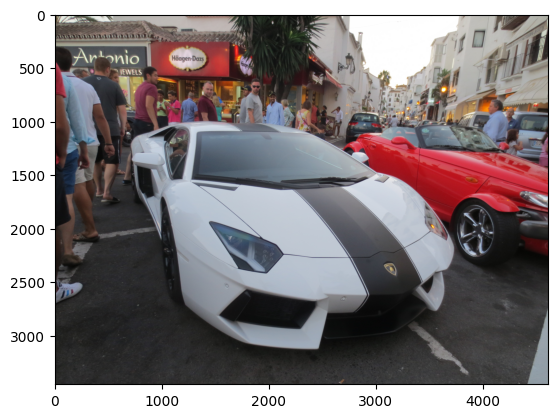

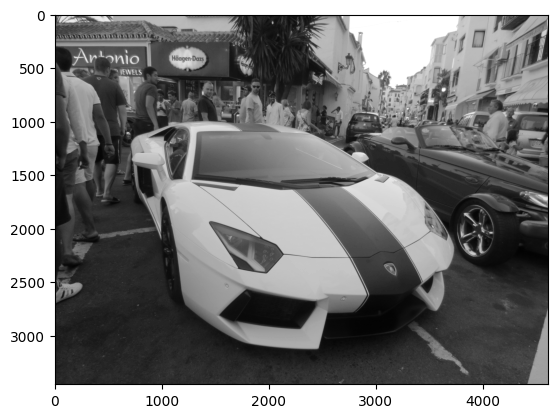

In [ ]:
im1 = cv2.imread('./IMG_0472.JPG')
im1 = cv2.cvtColor(im1, cv2.COLOR_BGR2RGB)
plt.imshow(im1)
plt.show()
gray_im1 = cv2.cvtColor(im1, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_im1, cmap='gray')
plt.show()

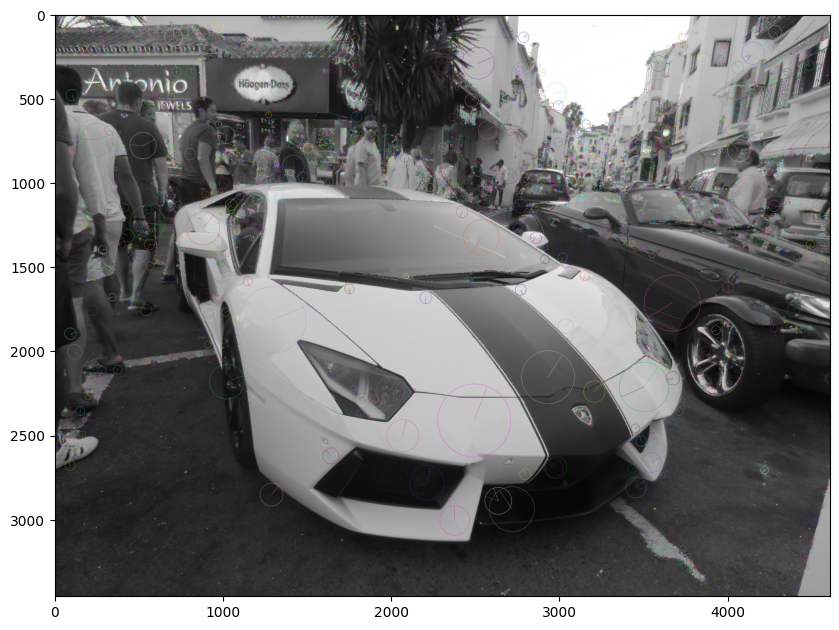

In [ ]:
sift = cv2.SIFT_create()

keypoints_1, descriptors_1 = sift.detectAndCompute(gray_im1, mask=None)
im1_sift = cv2.drawKeypoints(gray_im1, keypoints_1, im1, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.figure(figsize=(10,10))
plt.imshow(im1_sift)
plt.show()

In [ ]:
a=[1,2,3]
b= [9,8,7,6]
for elem in a:
  c=(np.hstack(['img1', elem]))
  np.vstack([c, 2])
c

ValueError: ignored

In [13]:
sift = cv2.SIFT_create()
descriptors = np.empty((0,129))
for i in range(466, 476):
  gray_im = cv2.cvtColor(cv2.imread('./IMG_0' + str(i) + '.JPG'), cv2.COLOR_BGR2GRAY)
  _ , descriptor = sift.detectAndCompute(gray_im, mask=None)

  descriptors_arr = np.array(descriptor)
  descriptors_arr = np.insert(descriptors_arr, 0, str(i), axis=1)
  descriptors =  np.vstack([descriptors, descriptors_arr])



In [15]:
descriptors.shape

(207809, 129)

In [51]:
from sklearn.neighbors import NearestNeighbors
knn = NearestNeighbors(n_neighbors=5, algorithm='auto', metric='euclidean')



descriptors_train = descriptors[:, 1:]
knn.fit(descriptors_train)

NearestNeighbors(metric='euclidean')

In [81]:
descriptors_img = descriptors[0, 1:].reshape(1, -1)
distance, indice = knn.kneighbors(descriptors_img, n_neighbors=5)

In [82]:
indice

array([[     0,   2185, 189198,  79035,  96101]])

In [83]:
distance

array([[  0.        , 252.1586802 , 263.52608979, 268.58518202,
        273.41543482]])

In [ ]:
for descriptor in descriptors_img:
  descriptors_img = descriptors[0, 1:].reshape(1, -1)
  distance, indice = knn.kneighbors(descriptors_img, n_neighbors=5)



In [78]:
descriptors[0, :].shape

(129,)